# ENCODE bigWig analysis questions

Do your best to answer all parts of each question. You are encouraged to collaborate, but should turn in your own answers. 

Please limit each answer to a maximum of one markdown cell, one code cell and one plot. 

Put helper functions into a separate script (e.g. `hwutils.py`) so the notebook can be focused on plotting. Also see the [workshop on Clean Code](https://drive.google.com/file/d/1TraVwRkbkCbHq-s_-NS69ZEbRNwH8XNh/view) from Dan Larremore (https://larremorelab.github.io/slides/) for good coding tips to use in this assignment.


In [10]:
# useful libraries to import

import pandas as pd
import numpy as np

import  sklearn.decomposition

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b') 
# nice way to format ticks as human-readable: ax.xaxis.set_major_formatter(bp_formatter)

from hwutils import *

In [53]:
# load dataFrame of bigWigs from ENCODE (encodeproject.org/), binned to 10kb resolution across chromosome 10.
# note that the first three columns are chrom,start,end and the other columns are labeled by bigWig file accession.
df = pd.read_table('/Users/randuan/Documents/USC/courses/QBIO577/assignment2/ENCODE_GRCh38_binned_subset.tsv')

# load metadata from ENCODE for bigwig files. 
# can be queried as follows: bigwig_metadata.query("`File accession`==@ df_column_name ")
bigwig_metadata = pd.read_table('/Users/randuan/Documents/USC/courses/QBIO577/assignment2/ENCODE_GRCh38_bigWig_metadata.tsv')

/var/folders/x9/9lg468h12139znfbwwg0v4_80000gn/T/ipykernel_20496/1552564005.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  bigwig_metadata = pd.read_table('/Users/randuan/Documents/USC/courses/QBIO577/assignment2/ENCODE_GRCh38_bigWig_metadata.tsv')


- After loading the data (above), and visualize some of the profiles. Why might many signals dip on chr10 at around 40Mb?


In [ ]:
#It is possible that chromosome 10 undergoes DNA methylation, an epigenetic modification known to play a pivotal role in gene expression and the maintenance of genomic organization. This methylation might influence the signaling dynamics of the genome.
#Alternatively, the presence of intricate structural conformations, such as chromosomal looping at specific loci on chromosome 10, could exert an effect on the genomic signals.

- Use scikit-learn to perform PCA, and make a scatterplot of PC1 vs PC2.


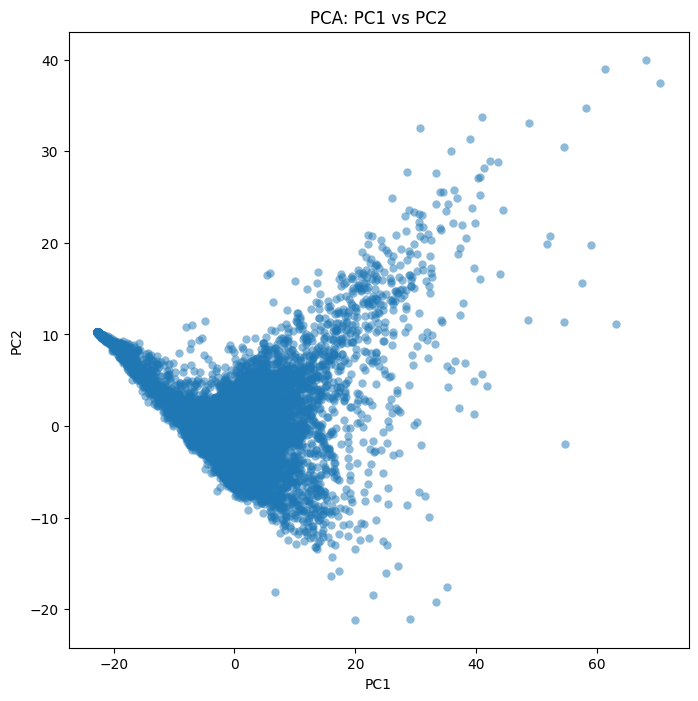

Index(['Unnamed: 0', 'File accession', 'File format', 'File type',
       'File format type', 'Output type', 'File assembly',
       'Experiment accession', 'Assay', 'Donor(s)', 'Biosample term id',
       'Biosample term name', 'Biosample type', 'Biosample organism',
       'Biosample treatments', 'Biosample treatments amount',
       'Biosample treatments duration',
       'Biosample genetic modifications methods',
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity', 'Experiment target',
       'Library made from', 'Library depleted in', 'Library extraction method',
       'Library lysis method', 'Library crosslinking method',
       'Library strand specific', 'Experiment date released', 'Project',
       'RBNS protein concentration', 'Library fragmentation method',
      

In [109]:
df = pd.read_table('/Users/randuan/Documents/USC/courses/QBIO577/assignment2/ENCODE_GRCh38_binned_subset.tsv')
df_subset = df.drop(['chrom', 'start', 'end'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_subset)

from sklearn.decomposition import PCA

# Create a PCA object and compute the first two principal components
pca_model = PCA(n_components=2)
principalComponents = pca_model.fit_transform(df_standardized)

class CustomPCA:
    def __init__(self, components, feature_names):
        self.components_ = components.T
        self.feature_names_in_ = feature_names

pca_custom = CustomPCA(principalComponents, df.columns)

plot_pca(pca_custom)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.show()

print(bigwig_metadata.columns)

- Try to use the experiment metadata to understand and remove outliers. Try labeling or coloring points by various metadata columns. Were any columns in the metadata useful for outlier removal? Note that `sklearn.preprocessing.LabelEncoder()` can be useful for transforming text strings to categories, and `plt.text` can be used to overlay labels with points.

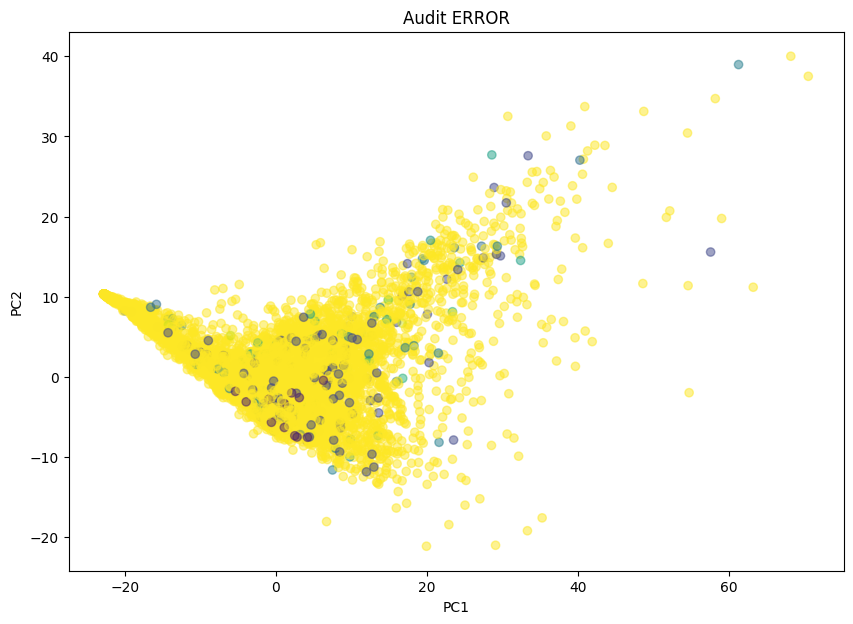

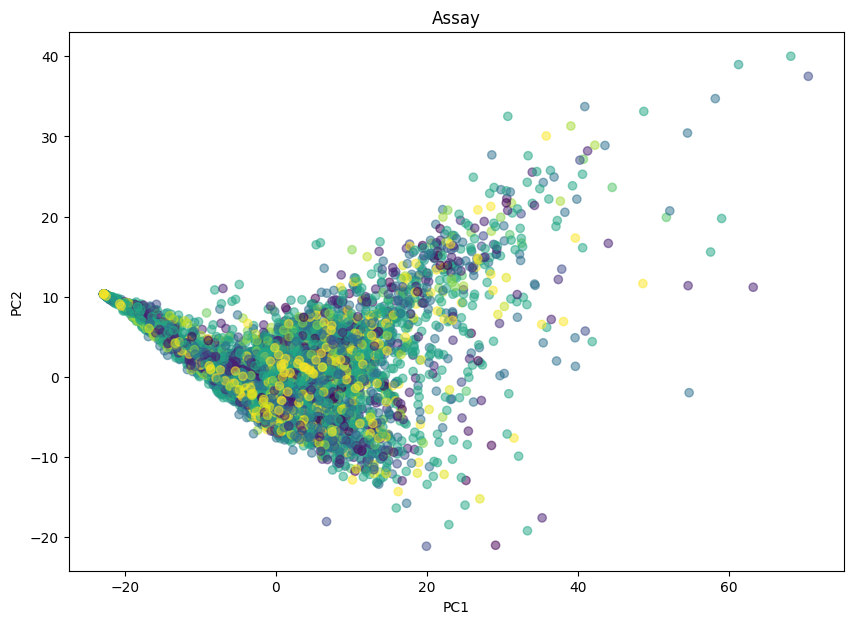

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_table('/Users/randuan/Documents/USC/courses/QBIO577/assignment2/ENCODE_GRCh38_binned_subset.tsv')
df_subset = df.drop(['chrom', 'start', 'end'], axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

pca = PCA(n_components=2) # for 2 principal components
pca_result = pca.fit_transform(df_scaled)

filtered_bigwig_metadata = bigwig_metadata[bigwig_metadata.index.isin(df_subset.index)]

le = LabelEncoder()
labels = le.fit_transform(filtered_bigwig_metadata['Audit ERROR'])

plt.figure(figsize=(10,7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Audit ERROR')
plt.show()

labels = le.fit_transform(filtered_bigwig_metadata['Assay'])

plt.figure(figsize=(10,7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Assay')
plt.show()

  

- Which Assays or Experiment Targets show broad vs narrow patterns? Is this consistent across cell types? Does this relate to the patterns seen in PCA? One way to investigate the characteristic scale is by computing the autocorrelation.


['TF ChIP-seq' 'Histone ChIP-seq' 'RAMPAGE' 'DNase-seq' 'CAGE'
 'total RNA-seq' 'polyA plus RNA-seq' 'small RNA-seq'
 'polyA minus RNA-seq' 'eCLIP' 'Control eCLIP' 'CRISPR RNA-seq'
 'shRNA RNA-seq' 'WGBS' 'microRNA-seq' 'ATAC-seq' 'GRO-cap' 'PRO-cap'
 'siRNA RNA-seq' 'GM DNase-seq' 'PRO-seq' 'CRISPRi RNA-seq' 'PAS-seq']
Autocorrelation for ENCFF953CVO: 0.219
Autocorrelation for ENCFF520IHF: 0.282
Autocorrelation for ENCFF730SPR: 0.794
Autocorrelation for ENCFF559YWA: 0.689
Autocorrelation for ENCFF640PJT: 0.353
Autocorrelation for ENCFF919FBG: 0.594
Autocorrelation for ENCFF141QAK: 0.765
Autocorrelation for ENCFF941KEV: 0.591
Autocorrelation for ENCFF589QXD: 0.737
Autocorrelation for ENCFF321LZL: 0.124
Autocorrelation for ENCFF352JSL: 0.743
Autocorrelation for ENCFF238OET: 0.692
Autocorrelation for ENCFF439PJT: 0.200
Autocorrelation for ENCFF156RFW: 0.139
Autocorrelation for ENCFF506AAX: 0.281
Autocorrelation for ENCFF127AXP: 0.767
Autocorrelation for ENCFF467BSQ: 0.239
Autocorrelation

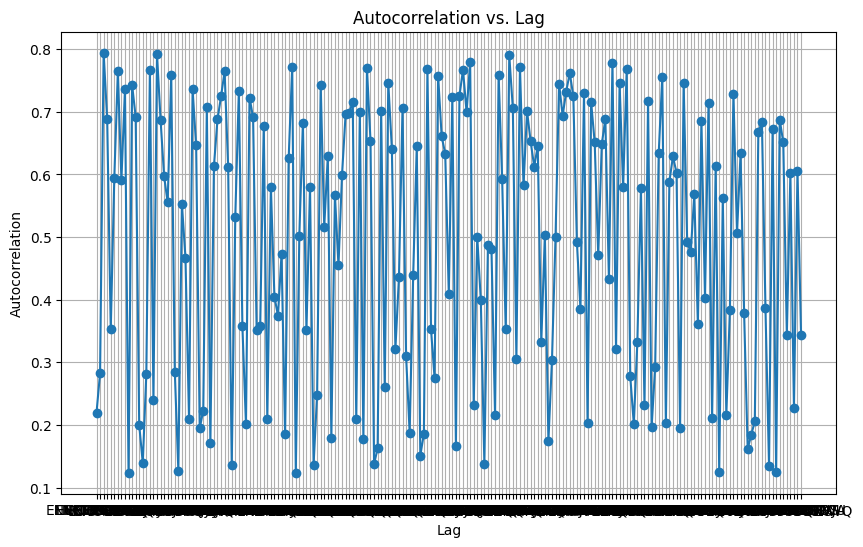

Autocorrelation for ENCFF953CVO: 0.159
Autocorrelation for ENCFF520IHF: 0.192
Autocorrelation for ENCFF730SPR: 0.768
Autocorrelation for ENCFF559YWA: 0.690
Autocorrelation for ENCFF640PJT: 0.302
Autocorrelation for ENCFF919FBG: 0.505
Autocorrelation for ENCFF141QAK: 0.724
Autocorrelation for ENCFF941KEV: 0.450
Autocorrelation for ENCFF589QXD: 0.642
Autocorrelation for ENCFF321LZL: 0.022
Autocorrelation for ENCFF352JSL: 0.659
Autocorrelation for ENCFF238OET: 0.607
Autocorrelation for ENCFF439PJT: 0.102
Autocorrelation for ENCFF156RFW: 0.110
Autocorrelation for ENCFF506AAX: 0.166
Autocorrelation for ENCFF127AXP: 0.706
Autocorrelation for ENCFF467BSQ: 0.183
Autocorrelation for ENCFF745TDK: 0.645
Autocorrelation for ENCFF806XAD: 0.498
Autocorrelation for ENCFF740VNX: 0.453
Autocorrelation for ENCFF045YJE: 0.382
Autocorrelation for ENCFF263DJX: 0.713
Autocorrelation for ENCFF652NKM: 0.231
Autocorrelation for ENCFF035DJL: 0.109
Autocorrelation for ENCFF348GJQ: 0.461
Autocorrelation for ENCFF

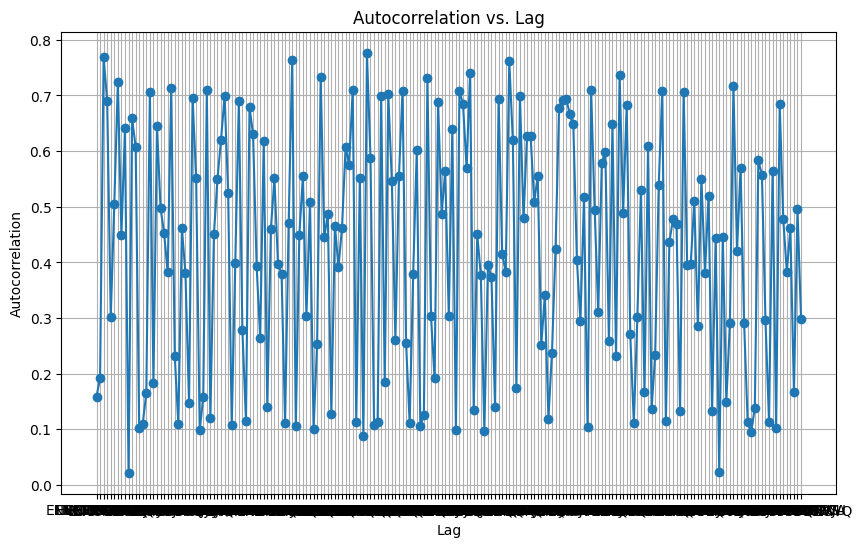

In [129]:
merged_df_subset = pd.concat([df_subset, filtered_bigwig_metadata[['Assay', 'Experiment target']]], axis=1)

cols_to_move = ['Assay', 'Experiment target']
new_columns = cols_to_move + [col for col in merged_df_subset if col not in cols_to_move]
merged_df_subset = merged_df_subset[new_columns]

unique_elements = merged_df_subset['Assay'].unique()
print(unique_elements)

specific_name = 'TF ChIP-seq'

filtered_df_1 = merged_df_subset[merged_df_subset['Assay'] == specific_name]
relevant_columns = filtered_df_1.columns[3:]

autocorrelations = {}
for col in relevant_columns:
    autocorr_value = filtered_df_1[col].autocorr()
    autocorrelations[col] = autocorr_value
    print(f"Autocorrelation for {col}: {autocorr_value:.3f}")

# Extract keys and values
lags = list(autocorrelations.keys())
values = list(autocorrelations.values())

# Plot
plt.figure(figsize=(10,6))
plt.plot(lags, values, marker='o')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation vs. Lag')
plt.grid(True)
plt.show()

specific_name = 'Histone ChIP-seq'

filtered_df_2 = merged_df_subset[merged_df_subset['Assay'] == specific_name]
relevant_columns = filtered_df_2.columns[3:]

autocorrelations = {}
for col in relevant_columns:
    autocorr_value = filtered_df_2[col].autocorr()
    autocorrelations[col] = autocorr_value
    print(f"Autocorrelation for {col}: {autocorr_value:.3f}")

# Extract keys and values
lags = list(autocorrelations.keys())
values = list(autocorrelations.values())

# Plot
plt.figure(figsize=(10,6))
plt.plot(lags, values, marker='o')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation vs. Lag')
plt.grid(True)
plt.show()



- Which "Experiment Targets" (e.g. histone marks or transcription factors) for which cell types are nearby in this PC1 vs PC2 space? Do any of these proximities have plausible biological interpretations? For example, are any polycomb-related factors in proximity? Illustrate this in a plot.


- How much does preprocessing matter? Try normalizing the variance per track and see if you arrive at similar or distinct conclusions. Try removing the region on chr10 mentioned above. Note that `sklearn.preprocessing.StandardScaler` could be useful for preprocessing. 


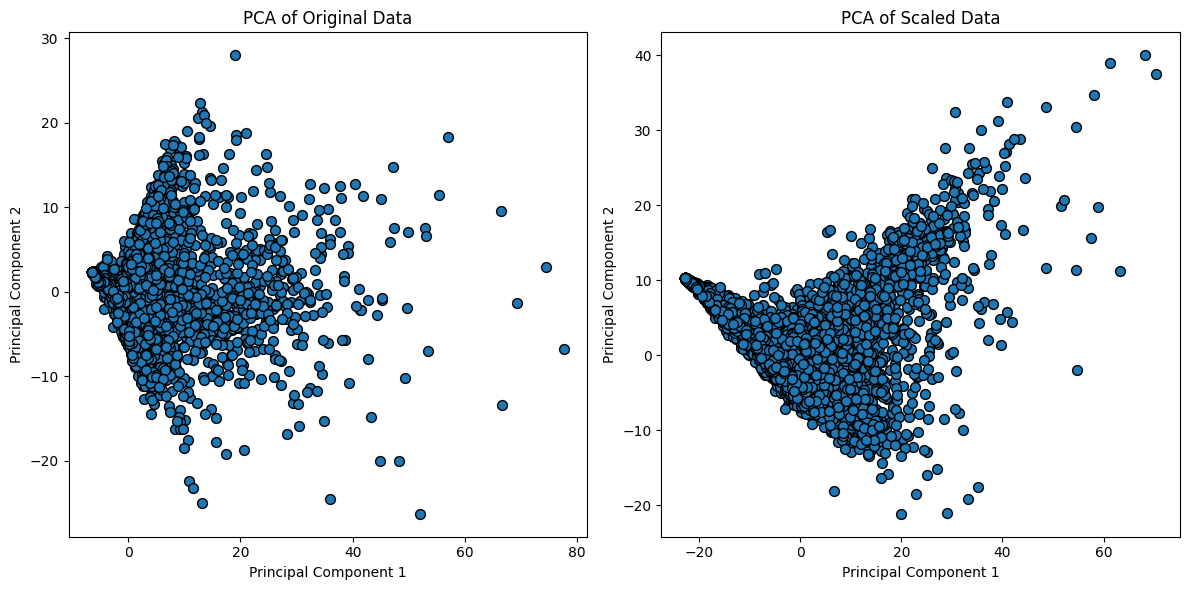

In [134]:
# For the original data
pca_original = PCA(n_components=2)
principalComponents_original = pca_original.fit_transform(df_subset)

# For the scaled data
pca_scaled = PCA(n_components=2)
principalComponents_scaled = pca_scaled.fit_transform(df_scaled)

# Plotting PCA for the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(principalComponents_original[:, 0], principalComponents_original[:, 1], edgecolor='k', s=50)
plt.title('PCA of Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting PCA for the scaled data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(principalComponents_scaled[:, 0], principalComponents_scaled[:, 1], edgecolor='k', s=50)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Assuming 'start' and 'end' are columns in df_subset specifying the genomic region
#region_to_remove_start = ...  # start of the problematic region
#region_to_remove_end = ...    # end of the problematic region
#df_filtered = df_subset[~((df_subset['start'] <= region_to_remove_end) & (df_subset['end'] >= region_to_remove_start))]
#Then perform PCA

- How many PCs are needed to explain 90% of the variance in the data? Illustrate this with a scree plot (https://en.wikipedia.org/wiki/Scree_plot). 


To explain 90% of the variance, 18 principal components are needed.


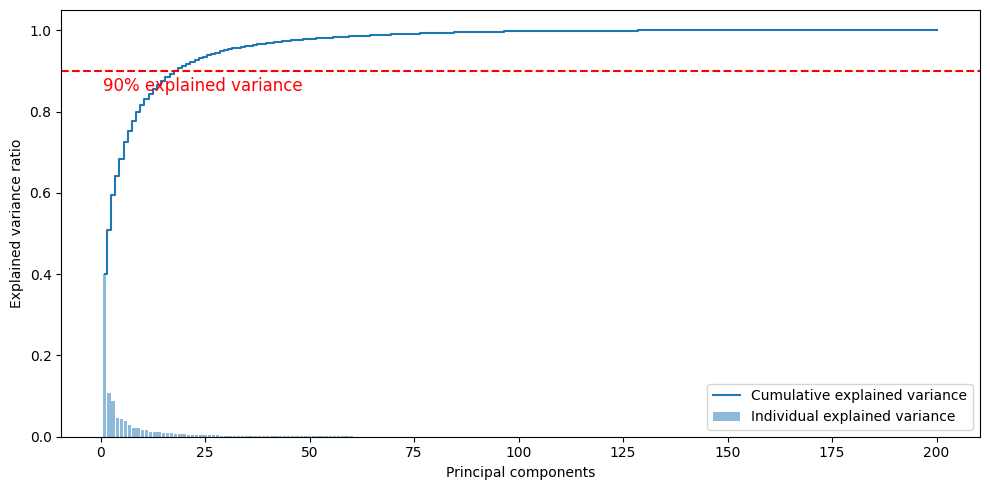

In [131]:
pca = PCA()
pca_result = pca.fit_transform(df_subset)

explained_var = pca.explained_variance_ratio_.cumsum()
num_components = np.where(explained_var >= 0.9)[0][0] + 1  # +1 because numpy is 0-indexed
print(f"To explain 90% of the variance, {num_components} principal components are needed.")

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), explained_var, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% explained variance', color = 'red', fontsize=12)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- How different is the dimensionality reduction into two dimensions for PCA from that obtained using MDS (multi-dimensional scaling)? What methods could be used to determine the similarity? Illustrate with a plot.


In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(df_subset)

from sklearn.manifold import MDS

mds = MDS(n_components=2)
principalComponents_mds = mds.fit_transform(df_subset)

plt.figure(figsize=(12, 6))

# Plotting PCA results
plt.subplot(1, 2, 1)
plt.scatter(principalComponents_pca[:, 0], principalComponents_pca[:, 1], edgecolor='k', s=50)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Plotting MDS results
plt.subplot(1, 2, 2)
plt.scatter(principalComponents_mds[:, 0], principalComponents_mds[:, 1], edgecolor='k', s=50)
plt.title('MDS')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()

from scipy.spatial import procrustes

_, _, disparity = procrustes(principalComponents_pca, principalComponents_mds)
print(f"Disparity between PCA and MDS: {disparity}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


- Would non-negative matrix factorization (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) be a useful method to use for this dataset? Why or why not?  (No plots needed for this question).


Yes, given that the dataset exclusively comprises non-negative values, the application of non-negative matrix factorization (NMF) seems appropriate. Furthermore, NMF can serve a role analogous to principal component analysis (PCA) in dimensionality reduction, thereby enhancing the dataset's suitability for visualization purposes.